# 머신러닝 II
## 실습 과제

### 데이터셋을 활용한 지도학습 모델 적용
1. 인터넷에서 자유롭게 데이터셋 확보
2. 데이터 탐색 및 전처리
    - 데이터셋을 로드하고, 결측치 처리, 인코딩 , 표준화 등 전처리 과정을 진행
    - 데이터의 특성과 분포를 시각화하여 이해
3. 모델 선택 및 학습
    - 배운 머신러닝 알고리즘을 적용하여 모델을 학습
        - K-최근접 이웃(K-NN)
        - 로지스틱 회귀(Logistic Regression)
        - 서포트 벡터 머신(SVM)
        - 결정 트리 (Decision Tree)
        - 랜덤 포레스트 (Random Forest)
        - 다층 퍼셉트론 (Multilayer Perceptron)
4. 모델 평가 및 시각화
    - 테스트 데이터셋을 사용하여 모델의 성능을 평가
    - 혼동 행렬 및 다른 시각화 기법을 사용하여 결과를 시각화


## 센서 데이터를 이용한 기계 고장 예측

### 데이터 설명
    - 다양한 기계에서 수집된 센서 데이터가 포함되어 있으며, 기께 고장을 미리 예측하는 것을 목표로 함
    - 여기에는 다양한 센서 판독값과 기록된 기계 고장이 포함
### columns 설명
    - footfall: 기계 앞을 지나가는 사람 또는 물체의 수
    - tempMode: 기계의 온도 모드 또는 설정
    - AQ: 기계 근처의 공기 질 지수
    - USS: 근접 측정을 나타내는 포음파 센서 데이터
    - CS: 기계의 전류 사용량을 나타내는 전류 센서 판독값
    - VOC: 기계 근처에서 감지된 휘발성 유기 화합물 수준
    - RP: 기계 부품의 회전 위치 또는 RPM(분당 회전 수)
    - IP: 기계에 대한 입력 압력
    - temperature: 기계의 작동 온도
    - fail: 기계 고장의 이진 표시기(고장은 1, 고장 없음은 0)

In [37]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# 데이터 로드
df = pd.read_csv('Machine_failure_data.csv')

print('*'* 30)
print(f"데이터 구조 확인:\n{df.info()}")
print('*'* 30)
print(f"데이터 샘플 확인:\n{df.head()}")
print('*'* 30)
print(f"데이터 기초통계 확인:\n{df.describe()}")
print('*'* 30)

******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB
데이터 구조 확인:
None
******************************
데이터 샘플 확인:
   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83       

In [10]:
# 결측치 확인
Missing_values = df.isnull().sum()

print(f"Missing value:\n{Missing_values}")

Missing value:
footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


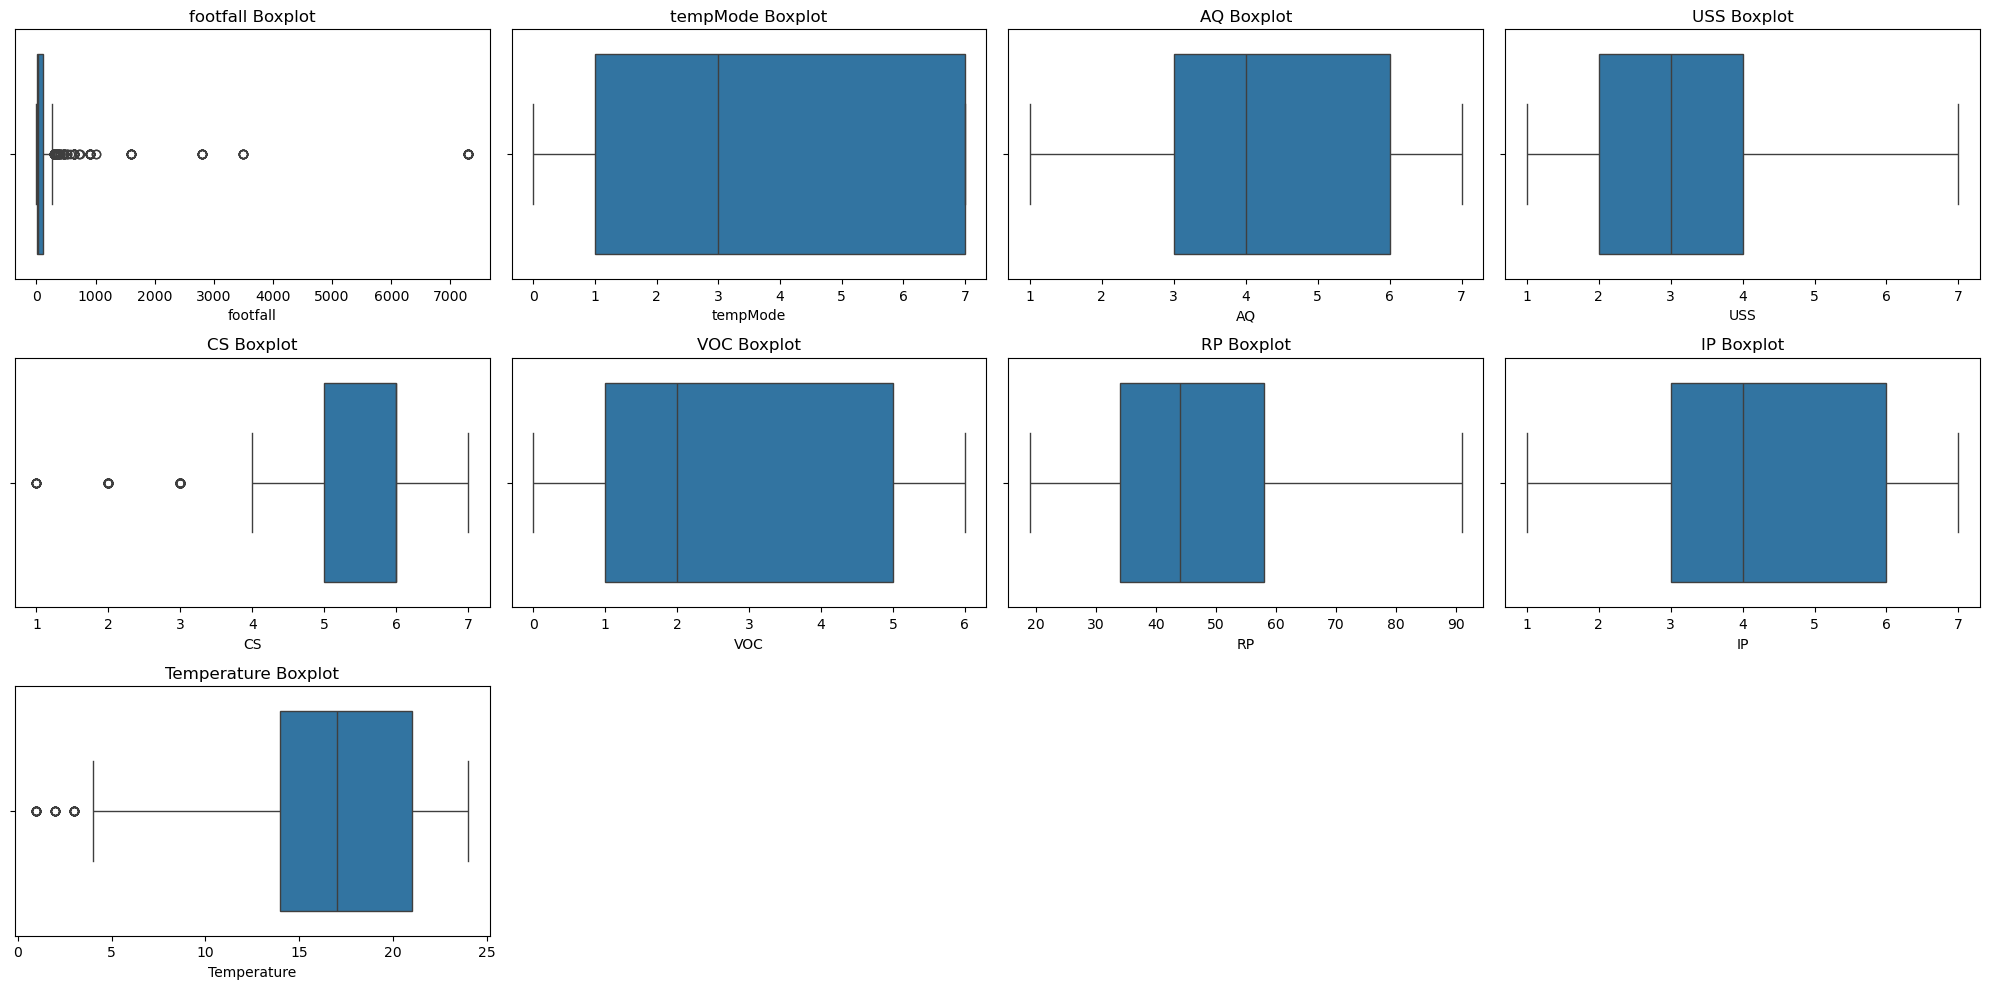

In [11]:
# 각 요소들의 분포 확인
# 박스 플롯 그리는 함수
def drow_boxplots(df):
    columns = df.columns
    num_plots = len(columns)
    
    # 서브 플롯 생성
    fig, axes = plt.subplots(nrows=(num_plots//4)+1, ncols=4, figsize=(20,10))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'{col} Boxplot')
        
    # 남은 빈 플롯 제거
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
            
    plt.tight_layout()
    plt.show()
    
# 박스플롯 그리기
num_df = df.drop(['fail'],axis=1)
drow_boxplots(num_df)

In [12]:
# 이상치 중앙값으로 대체하는 함수
def replace_outliers_with_median(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = df[column].median()
        
        df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    
    return df
# 이상치 대체
columns_with_outliers = ['footfall', 'CS', 'Temperature']
df_cleaned = replace_outliers_with_median(df, columns_with_outliers)
# output_path = './Machine_failure_data_cleaned.csv'
# df_cleaned.to_csv(output_path, index=False)

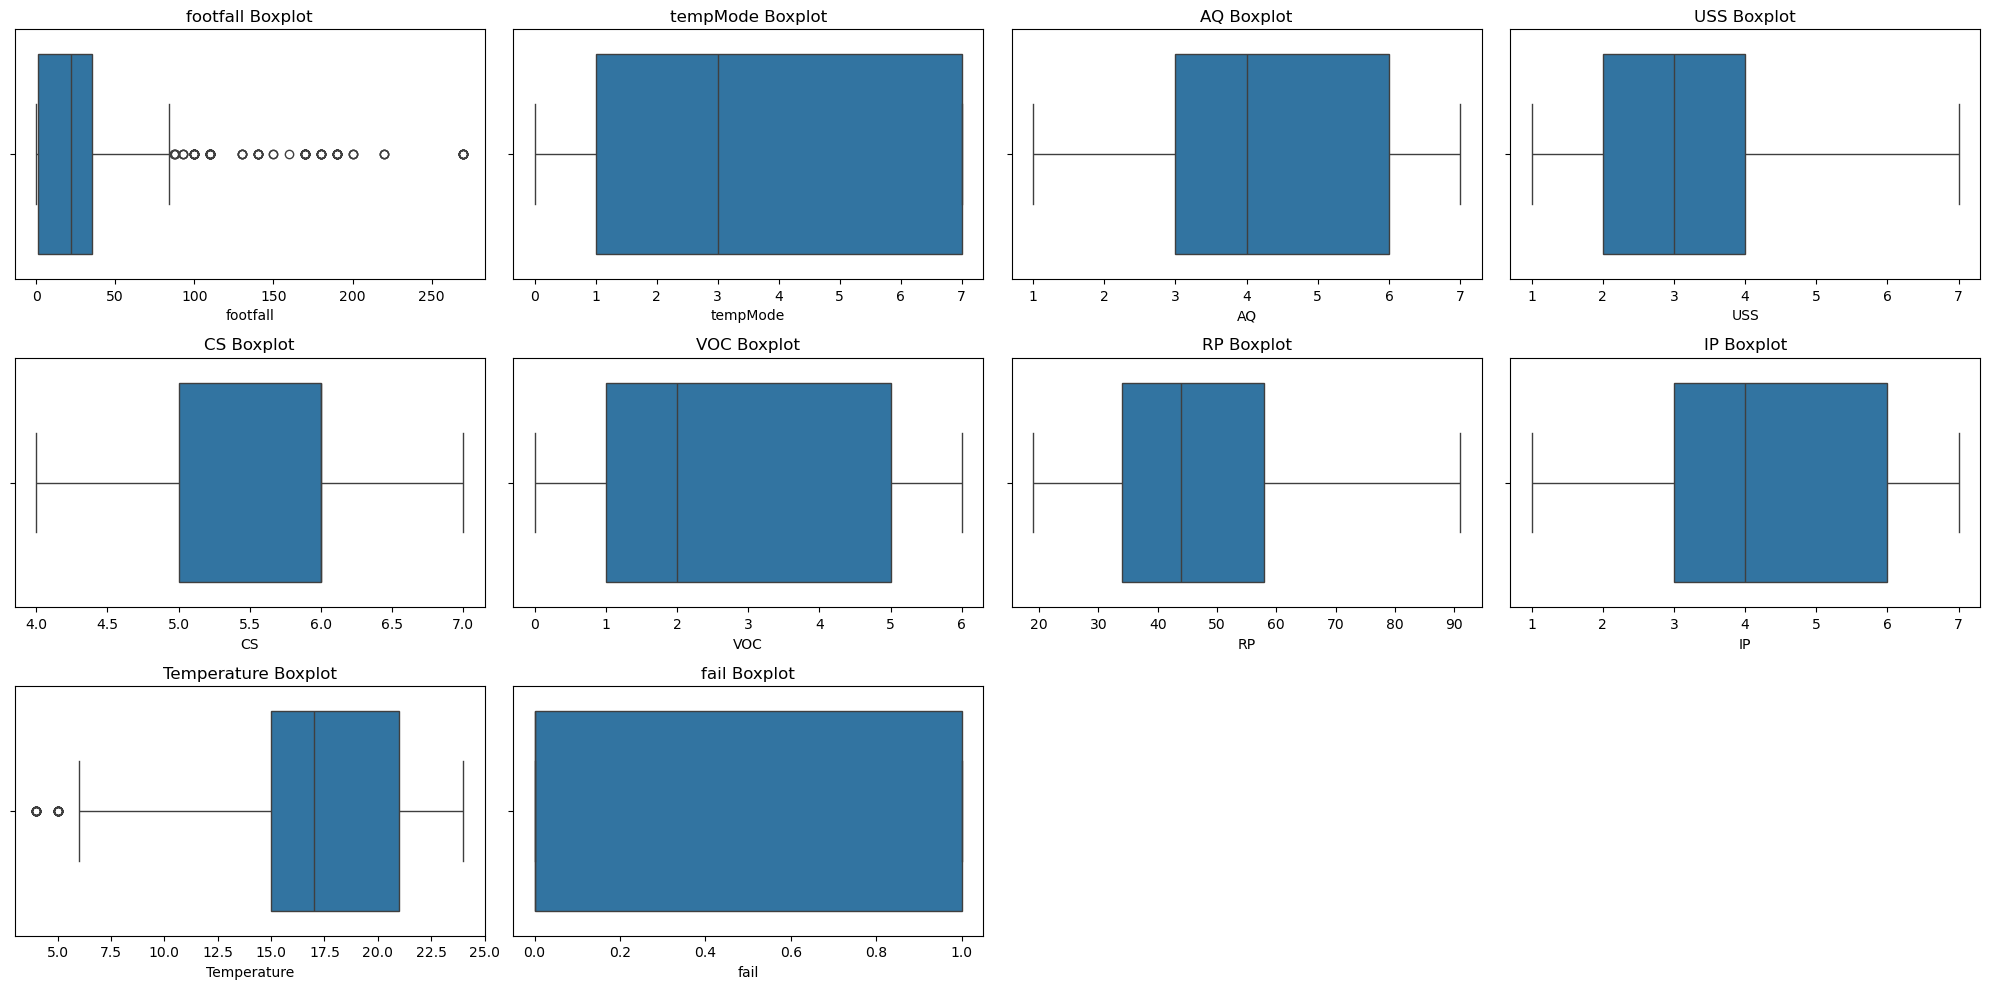

In [13]:
# 데이터 전처리 후 데이터 확인
drow_boxplots(df_cleaned)

- 인코딩
    - 모든 컬럼이 수치형 데이터이기 때문에 인코딩 필요 X
- 표준화
    1. KNN -> 거리 기반 알고리즘이므로 표준화가 매우 중요(정규화)
    2. 로지스틱 회귀 -> 경사 하강법을 사용하는 알고리즘으로 피쳐 스케일리 중요한 역할 수행 (표준화)
    3. 서포트 벡터 머신 -> 거리 기반 알고리즘으로 표준화 매우 중요 (표준화)
    4. 결정 트리 -> 트리 기반 알고리즘은 피처 스케일에 크게 민감하지 않음 
    5. 랜덤 포레스트 -> 트리 기반 알고리즘이므로 피처 스케일에 크게 민감하지 않음
    6. 다층 퍼셉트론 -> 신경망 알고리즘이므로 표준화가 학습에 도움 (표준화)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

class FeatureScaler:
    def __init__(self, method='standardize'):
        if method == 'standardize':
            self.pipeline = Pipeline([
                ('scaler', StandardScaler())
            ])
        elif method == 'normalize':
            self.pipeline = Pipeline([
                ('scaler', MinMaxScaler())
            ])
        else:
            raise ValueError("Invalid method. Use 'standardize' or ' normalize")
        
    def fit_transform(self, data):
        return self.pipeline.fit_transform(num_df)
    
    def transform(self, data):
        return self.pipeline.transform(num_df)

num_df = df_cleaned.drop(['fail'], axis = 1)
    
# FeatureScaler 인스턴스 생성 (표준화)
standardizer = FeatureScaler(method='standardize')

# 데이터 표준화
standardized_data = standardizer.fit_transform(num_df)
standardized_df = pd.DataFrame(standardized_data, columns = num_df.columns)
print("Standardized Data:\n", standardized_df)

# FeatureScaler 인스턴스 생성 (정규화)
normalizer = FeatureScaler(method='normalize')

# 데이터 정규화
normalized_data = normalizer.fit_transform(num_df)
normalized_df = pd.DataFrame(normalized_data, columns = num_df.columns)
print("Normalized Data:\n", normalized_df)



Standardized Data:
      footfall  tempMode        AQ       USS        CS       VOC        RP  \
0   -0.679098  1.222896  1.860497 -1.402480  0.340446  1.389813 -0.672788   
1    3.127010 -1.019410 -0.921775  0.043660 -0.924833 -0.810763 -1.647540   
2   -0.058102  1.222896 -1.617343 -0.679410  0.340446 -0.810763 -1.403852   
3    0.983570  0.101743 -0.921775  0.766730 -0.924833 -0.810763 -1.160164   
4   -0.238391  1.222896  0.469361  2.212869 -2.190112 -1.250878  1.276716   
..        ...       ...       ...       ...       ...       ...       ...   
939 -0.679098  1.222896  1.860497 -1.402480  0.340446  0.509582  1.581326   
940 -0.679098  1.222896  0.469361 -0.679410  0.340446  1.389813  0.180120   
941 -0.679098 -0.271975  1.164929 -0.679410  1.605725  0.949698 -0.246334   
942 -0.679098  0.849179  1.164929 -0.679410 -0.924833  1.389813 -0.063568   
943 -0.318520  1.222896 -0.226207 -0.679410  0.340446  0.069467  0.850262   

           IP  Temperature  
0   -0.979504    -0.019453

In [15]:
standardized_df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature
0,-0.679098,1.222896,1.860497,-1.402480,0.340446,1.389813,-0.672788,-0.979504,-0.019453
1,3.127010,-1.019410,-0.921775,0.043660,-0.924833,-0.810763,-1.647540,-0.353894,-0.019453
2,-0.058102,1.222896,-1.617343,-0.679410,0.340446,-0.810763,-1.403852,0.897327,-0.019453
3,0.983570,0.101743,-0.921775,0.766730,-0.924833,-0.810763,-1.160164,0.897327,-0.019453
4,-0.238391,1.222896,0.469361,2.212869,-2.190112,-1.250878,1.276716,0.897327,-0.019453


In [16]:
normalized_df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature
0,0.000000,1.000000,1.000000,0.000000,0.666667,1.000000,0.236111,0.333333,0.65
1,0.703704,0.142857,0.333333,0.333333,0.333333,0.166667,0.013889,0.500000,0.65
2,0.114815,1.000000,0.166667,0.166667,0.666667,0.166667,0.069444,0.833333,0.65
3,0.307407,0.571429,0.333333,0.500000,0.333333,0.166667,0.125000,0.833333,0.65
4,0.081481,1.000000,0.666667,0.833333,0.000000,0.000000,0.680556,0.833333,0.65


# 1. k- 최근점 이웃 (k-NN)
    - 클래스를 예측하기 위해, 그 데이터 포인트와 가장 가까운 K개의 이수을 기반으로 결정을 내리는 알고리즘
    - 분류(Classification)와 회귀(Regression) 문제 모두에 사용
    - 학습 단계에서 모델을 학습하지 않고, 예측 시에 훈련 데이터와의 거리를 계산

    - 비수모적 방법: K-NN은 데이터 분포에 대해 특정한 가정을 하지 않는 비수모적 방법입니다
    - 메모리 기반: 모델을 학습하는 과정이 없고, 예측 시에 모든 학습 데이터를 메모리에 저장하고 사용
    - 단순성: 구현이 매우 간단하지만, 강력한 성능을 발휘

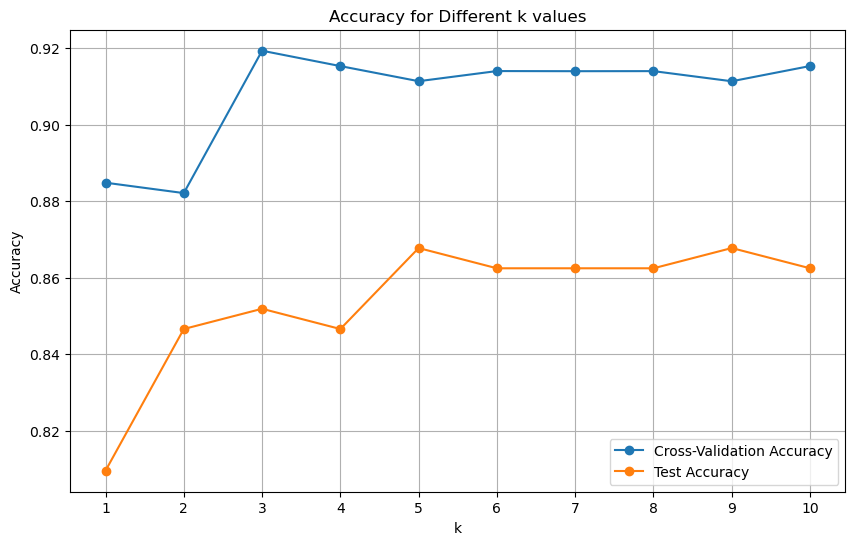

In [17]:
# K-최근접 이웃(K-NN)
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#X, y 설정
X, y = normalized_df, df['fail']

# 데이터셋을 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# k 값의 범위를 설정
k_range = range(1, 11)

# 교차 검증 정확도 저장용 리스트
cross_val_scores = []
test_accuracies = []

# 각 k 값에 대해 교차 검증 수행 및 테스트 세트 정확도 계산
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # 교차 검증 수행
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cross_val_scores.append(scores.mean())
    
    # 테스트 세트 정확도 계산
    knn.fit(X_train, y_train)
    test_accuracy = knn.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# k 값에 따른 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_range, cross_val_scores, label='Cross-Validation Accuracy', marker='o')
plt.plot(k_range, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Accuracy for Different k values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(k_range)
plt.grid(True)
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       102
           1       0.84      0.89      0.86        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189



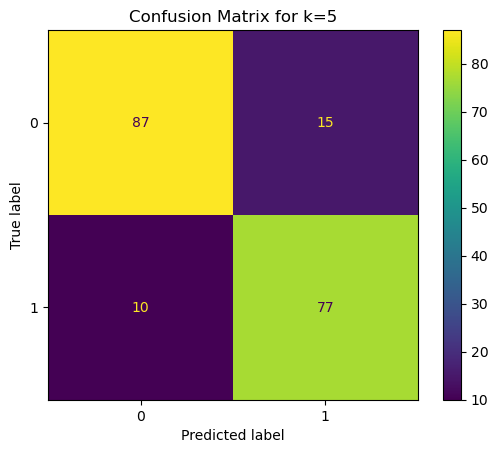

In [18]:
# 최적의 k 값으로 모델 학습 및 평가
knn_best = KNeighborsClassifier(n_neighbors=5)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

# 성능 평가
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title(f'Confusion Matrix for k={5}')
plt.show()


# 2. 로지스틱 회귀(Logistic Regression)
    - 입력된 독립 변수들의 선형 결합을 통해 종속 변수(이진 변수)의 확률을 예측하는 통계적 모델
    - 입력 변수들의 선형 결합을 통해 특정 사건이 발생할 확률을 예측
    - 다중 클래스 분류 문제에서도 확장하여 사용 가능

    - 분류 알고리즘: 이진 분류 문제를 해결하기 위해 주로 사용
    - 확률 출력: 예측 결과를 0과 1사이의 확률로 출력
    - 선형 회귀와의 차이점: 선형 회귀는 연속적인 값을 예측하지만, 로지스틱 회귀는 이진 값을 예측

In [19]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score

#X, y 설정
X, y = standardized_df, df['fail']

# 데이터셋을 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# K-NN 모델 학습
log_reg = LogisticRegression(max_iter=20000)
log_reg.fit(X_train, y_train)

# 예측 및 평가
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       102
           1       0.85      0.90      0.87        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189



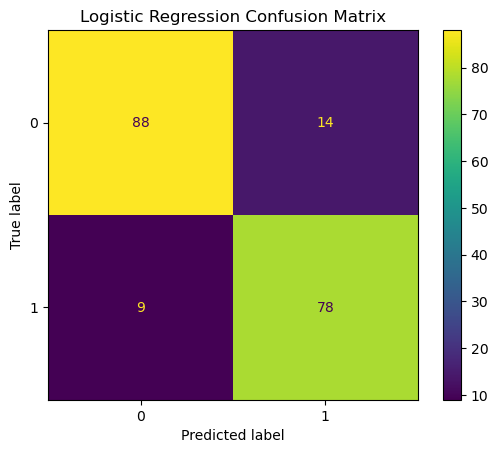

In [20]:
# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

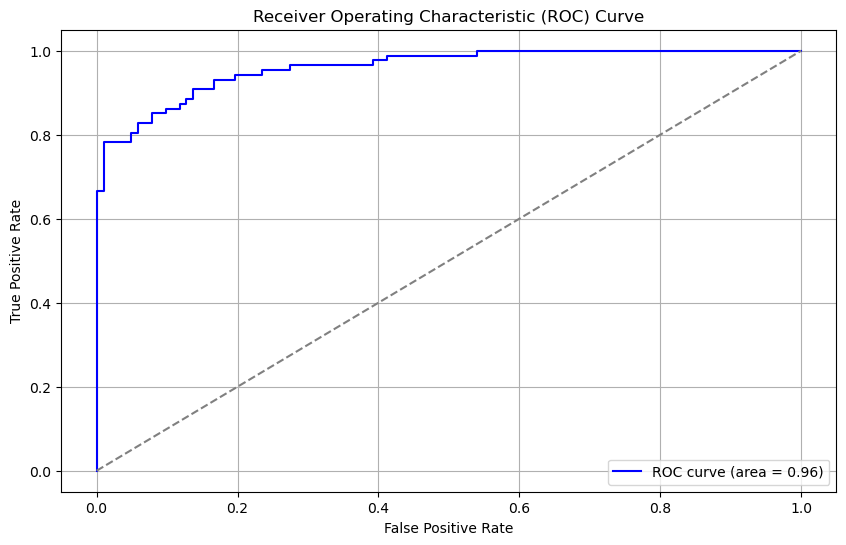

In [21]:
# ROC 곡선 그리기
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 3. 서포트 벡터 머신(Support Vector Machine)
    - 데이터를 분리하는 최적의 초평면을 찾는 지도학습 알고리즘
    - 선형 분리가 불가능한 데이터(비선형 데이터)에 대해서도 작동
    - 다중 클래스 분류 문제에서도 확장하여 사용 가능

    - 결정 초평면: 두 클래스를 분리하는 최적의 초평면 탐색
    - 서포트 벡터: 결정 초평면과 가장 가까운 데이터 포인트들로, 초평면을 결정하는 데 중요한 역할
    - 마진 최대화: 초평면과 서포트 벡터 사이의 거리를 최대화하여 일반화 성능을 높임

In [22]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [23]:
X, y = standardized_df, df['fail']

# 데이터셋을 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM 모델 학습
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# 예측 및 평가
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       102
           1       0.84      0.90      0.87        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.88      0.87      0.87       189



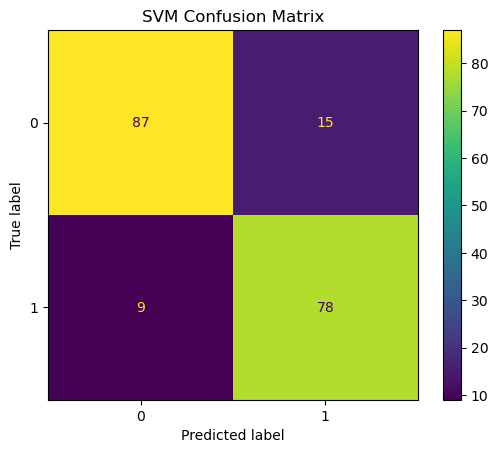

In [24]:
# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)
plt.title("SVM Confusion Matrix")
plt.show()

# 4. 결정 트리(Decision Tree)
    - 분류와 회귀 문제에 모두 사용되는 지도학습 알고리즘
    - 특성들을 기반으로 데이터를 분할하여 예측을 수행하는 트리 구조의 모델
    - 각 내부 노드는 특성의 조건
    - 각 가지(branch)는 조건의 결과
    - 각 리프 노드(leaf node)는 예측 값

    - 직관적: 결정 트리는 시각적으로 표현 가능
    - 비모수적 방법: 데이터 분포에 대한 특정 가정을 필요로 하지 않음
    - 해석 용이성: 모델의 결정을 쉽게 해석 가능

              precision    recall  f1-score   support

           0       1.00      0.06      0.11       102
           1       0.48      1.00      0.64        87

    accuracy                           0.49       189
   macro avg       0.74      0.53      0.38       189
weighted avg       0.76      0.49      0.36       189

Best parameters: {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.91      0.69      0.78       102
           1       0.71      0.92      0.80        87

    accuracy                           0.79       189
   macro avg       0.81      0.80      0.79       189
weighted avg       0.82      0.79      0.79       189



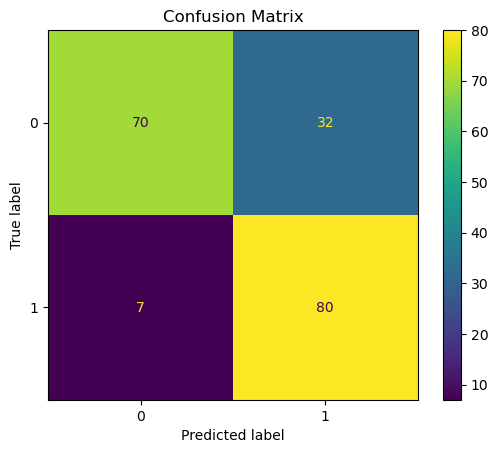

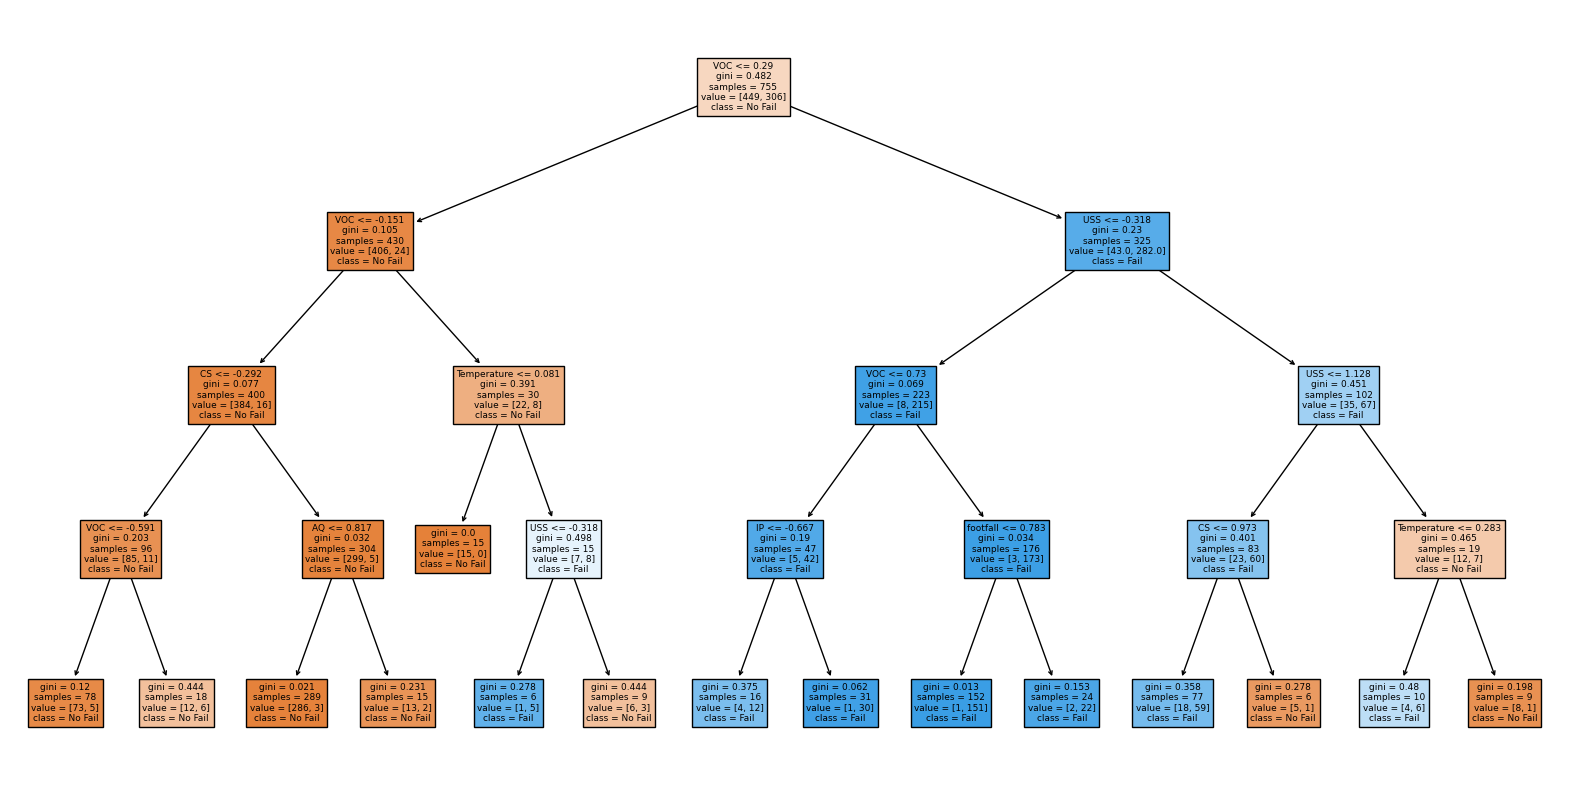

In [25]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#X, y 설정
X, y = normalized_df, df['fail']

# 데이터셋을 학습 세트와 테스트 세트로 분할
X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결정 트리 모델 학습
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)

# 예측 및 평가
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

# 하이퍼파라미터 튜닝을 위한 그리드 설정
param_grid = {
    'max_depth': [2,4,6,8,10,12],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f'Best parameters: {grid_search.best_params_}')

# 최적의 모델로 예측 및 평가
best_tree = grid_search.best_estimator_
y_pred_best = best_tree.predict(X_test)
print(classification_report(y_test, y_pred_best))

# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.title('Confusion Matrix')
plt.show()

# 결정 트리 시각화 (최적의 모델)
plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=df_cleaned.columns, class_names=['No Fail', 'Fail'])
plt.show()

# 4. 랜덤 포레스트(Random Forest)
    - 분류와 회귀 문제에 모두 사용되는 지도학습 알고리즘
    - 여러 개의 결정 트리를 결합하여 예측 성능을 향상시키는 알고리즘

    - 다양성: 각 트리가 서로 다른 부분집합의 데이터와 특성을 사용하여 학습하므로, 다양상을 갖추게 됨
    - 앙상블 방법: 여러 모델의 예측을 결합하여 성능을 향상
    - 과적합 방지: 개별 결정 트리의 과적합을 줄이고, 일반화 성능을 향상

In [26]:
print(normalized_df.head())
print(normalized_df.describe())

   footfall  tempMode        AQ       USS        CS       VOC        RP  \
0  0.000000  1.000000  1.000000  0.000000  0.666667  1.000000  0.236111   
1  0.703704  0.142857  0.333333  0.333333  0.333333  0.166667  0.013889   
2  0.114815  1.000000  0.166667  0.166667  0.666667  0.166667  0.069444   
3  0.307407  0.571429  0.333333  0.500000  0.333333  0.166667  0.125000   
4  0.081481  1.000000  0.666667  0.833333  0.000000  0.000000  0.680556   

         IP  Temperature  
0  0.333333         0.65  
1  0.500000         0.65  
2  0.833333         0.65  
3  0.833333         0.65  
4  0.833333         0.65  
         footfall    tempMode          AQ         USS          CS         VOC  \
count  944.000000  944.000000  944.000000  944.000000  944.000000  944.000000   
mean     0.125557    0.532536    0.554202    0.323270    0.576977    0.473694   
std      0.184986    0.382462    0.239739    0.230621    0.263586    0.378890   
min      0.000000    0.000000    0.000000    0.000000    0.0000

In [56]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [63]:

# X,y 설정
X,y = df.drop(['fail'],axis=1), df['fail']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터셋을 학습 세트와 테스트 세트로 분할
X_trian, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
rf = RandomForestClassifier(random_state=42)

# 하이퍼파라미터 튜닝을 위한 그리드 설정
param_grid = {
    'n_estimators': [50, 100],
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')



Best parameters: {'n_estimators': 100}


In [64]:
rf_clf = RandomForestClassifier(n_estimators = 100, random_state=42)

rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# 교차 검증 점수
cross_val_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='precision')
print(f"Cross-Validation Precision Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Precision: {cross_val_scores.mean():.2f}")



              precision    recall  f1-score   support

           0       0.89      0.88      0.89       102
           1       0.86      0.87      0.87        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189


Accuracy Score: 0.8783068783068783
Cross-Validation Precision Scores: [0.84615385 0.86885246 0.90322581 0.93333333 0.90163934]
Mean Cross-Validation Precision: 0.89


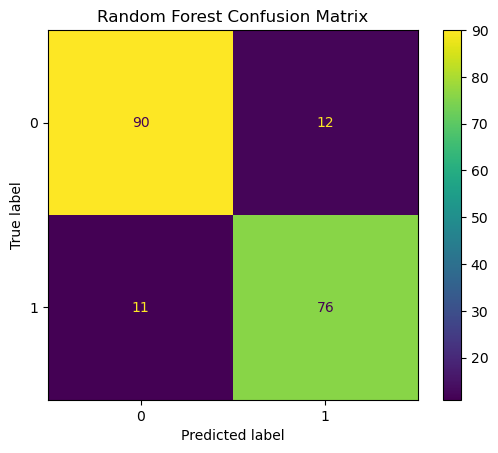

In [65]:
# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

# 4. 신경망 (Neural Network) - 다층 퍼셉트론
    - 다층 퍼셉트론(Multilayer Perceptron, MLP)은 인공 신경망의 한 종류
    - 비선형 활성화 함수를 사용하여 복잡한 패턴을 학습할 수 있으며, 주로 분류와 회귀 문제에 사용
    - 입력층, 하나 이상의 은닉층, 출력층으로 구성된 피드포워드 신경망
    - 각 뉴런은 이전 층의 뉴련으로부터 입력을 받아 가중치를 적용하고, 활성화 함수를 통해 출력을 생성

- 구조
    - 입력층(Input Layer): 모델에 입력되는 데이터를 받는 층
    - 은닉층(Hidden Layer): 입력층과 출력층 사이에 위치하며, 데이터를 처리하고 특징을 추출
    - 출력층(Output Layer): 모델의 최종 예측 값을 출력하는 층

In [31]:
# 필요한 라이브러리 임포트
import warnings
from sklearn.exceptions import ConvergenceWarning


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from scipy.stats import uniform, randint

/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (97) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (97) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (81) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (97) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_mult

Best parameters: {'alpha': 0.08093973481164612, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.0016966252220214195, 'max_iter': 101}
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       102
           1       0.85      0.89      0.87        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189



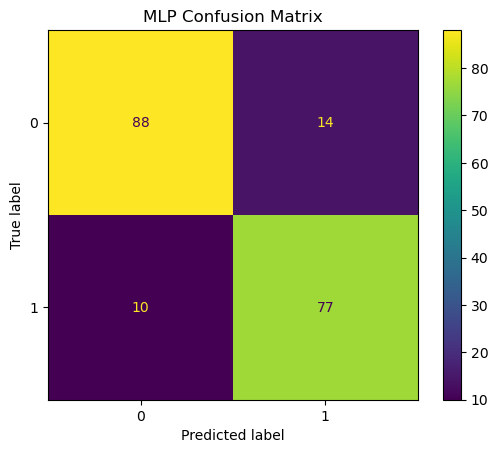

Cross-Validation Precision Scores: [0.89830508 0.89830508 0.890625   0.96491228 0.87096774]
Mean Cross-Validation Precision: 0.90


In [32]:
# ConvergenceWarning 억제
warnings.simplefilter("ignore", category=ConvergenceWarning)


# X,y 설정
X, y = standardized_df, df['fail']

# 데이터셋을 학습 세트와 테스트 세트로 분할
X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다층 퍼셉트론 모델 학습
mlp = MLPClassifier(random_state=42)


# 하이퍼파라미터 범위 설정
param_dist = {
    'hidden_layer_sizes':[(50,), (100,), (150,), (100, 50), (100, 100, 50)],
    'learning_rate_init': uniform(0.0001, 0.1),
    'alpha': uniform(0.0001, 0.1),
    'max_iter': randint(10, 300)
}

# RandomizedSearchCV를 사용한 하이퍼파라미터 튜닝
random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist, n_iter=50, cv=10, scoring='precision', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = random_search.best_params_
print(f'Best parameters: {best_params}')

# 최적의 모델로 예측 및 평가
best_mlp = random_search.best_estimator_
y_pred_best = best_mlp.predict(X_test)
print(classification_report(y_test, y_pred_best))

# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.title('MLP Confusion Matrix')
plt.show()

# 교차 검증 점수
cross_val_scores = cross_val_score(best_mlp, X_train, y_train, cv=5, scoring='precision')
print(f"Cross-Validation Precision Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Precision: {cross_val_scores.mean():.2f}")